In [1]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import random
import gif
import time 
import torch.nn as nn
import os
from PIL import Image
import torch
from torch.optim import Adam
import torchvision.models as models
from torchvision import transforms
from torch.nn import CrossEntropyLoss

# Question 1

In [2]:
model = models.resnet50(weights="IMAGENET1K_V2")

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [3]:
def normalize(img):
    img = (img - torch.min(img))/(torch.max(img) - torch.min(img))
    return img

# Vanilla Backpropagation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

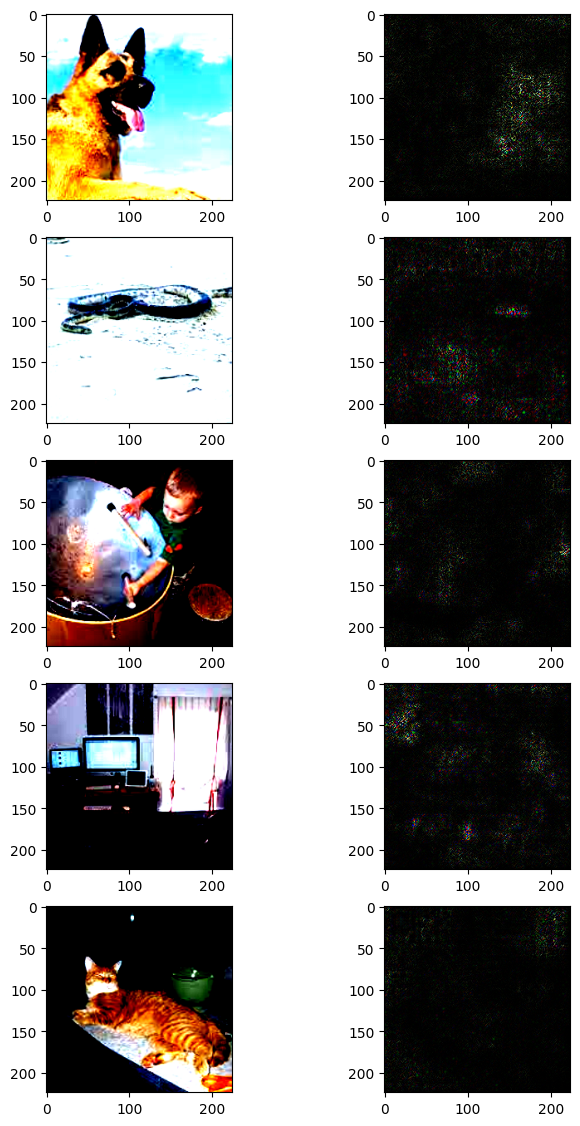

In [4]:
model = models.resnet50(weights="IMAGENET1K_V2")
allimages = torch.empty((5,3,224,224))
datapath = 'sample-images/'
j=1
k=1
original = {}
plt.figure(figsize=(8,14))
for i in os.listdir(datapath):
    input_image = Image.open(datapath+i)
    processed = preprocess(input_image)
    original[k] = torch.permute(processed,(1,2,0))
    input_tensor = processed.unsqueeze(0)
    input_tensor = input_tensor.requires_grad_()
    output = model(input_tensor)
    _,w = torch.topk(output,1)
    q = torch.zeros(output.shape)
    q[0,w.item()] = 1
    output.backward(q)
    
    
    plt.subplot(5,2,j)
    plt.imshow(torch.permute(input_tensor.squeeze(),(1,2,0)).detach().numpy())
    
    j=j+1
    
    plt.subplot(5,2,j)
    plt.imshow(torch.permute(input_tensor.grad.squeeze(),(1,2,0)))
    
    j=j+1
    k = k+1

# Guided BackPropagation

In [5]:
def hook_gui_prop(module, input_, output):
    input_ = torch.Tensor(input_[0])
    input_ = torch.where(input_<0,0,input_) 
    return (input_,)

In [6]:
hs = []
for name,module in (model.named_modules()):
    if isinstance(module, torch.nn.ReLU):
        hs.append(module.register_backward_hook(hook_gui_prop))

/home/lokesh/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


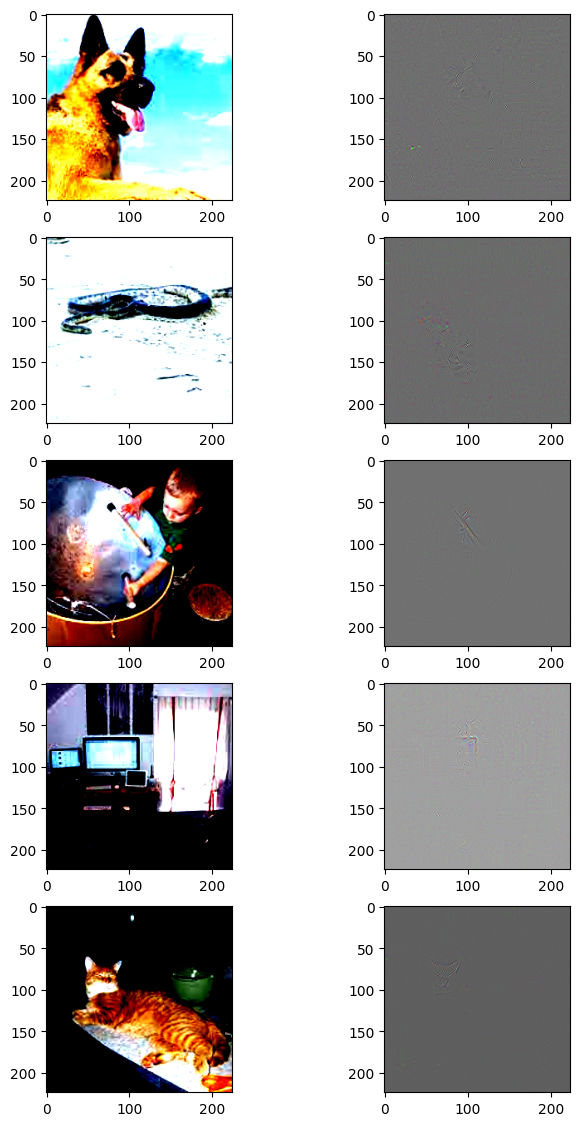

In [7]:
from PIL import Image
allimages = torch.empty((5,3,224,224))
datapath = 'sample-images/'
j=1
k=1
guided_back = {}
plt.figure(figsize=(8,14))
for i in os.listdir(datapath):
    input_image = Image.open(datapath+i)
    input_tensor = preprocess(input_image).unsqueeze(0)
    input_tensor = input_tensor.requires_grad_()
    output = model(input_tensor)
    _,w = torch.topk(output,1)
    q = torch.zeros(output.shape)
    q[0,w.item()] = 1
    output.backward(q)
    
    
    plt.subplot(5,2,j)
    plt.imshow(torch.permute(input_tensor.squeeze(),(1,2,0)).detach().numpy())
    
    j=j+1
    
    plt.subplot(5,2,j)
    guided_back[k] = torch.permute(input_tensor.grad.squeeze(),(1,2,0))
    k=k+1
    plt.imshow(normalize(torch.permute(input_tensor.grad.squeeze(),(1,2,0))))
    
    j=j+1

In [8]:
for h in hs :
    h.remove()

# Class Activation Map(CAM)

In [9]:
def hook_CAM(dictname,key):
    def hook(module, input_, output):
        dictname[key] = output.detach()
    return hook

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

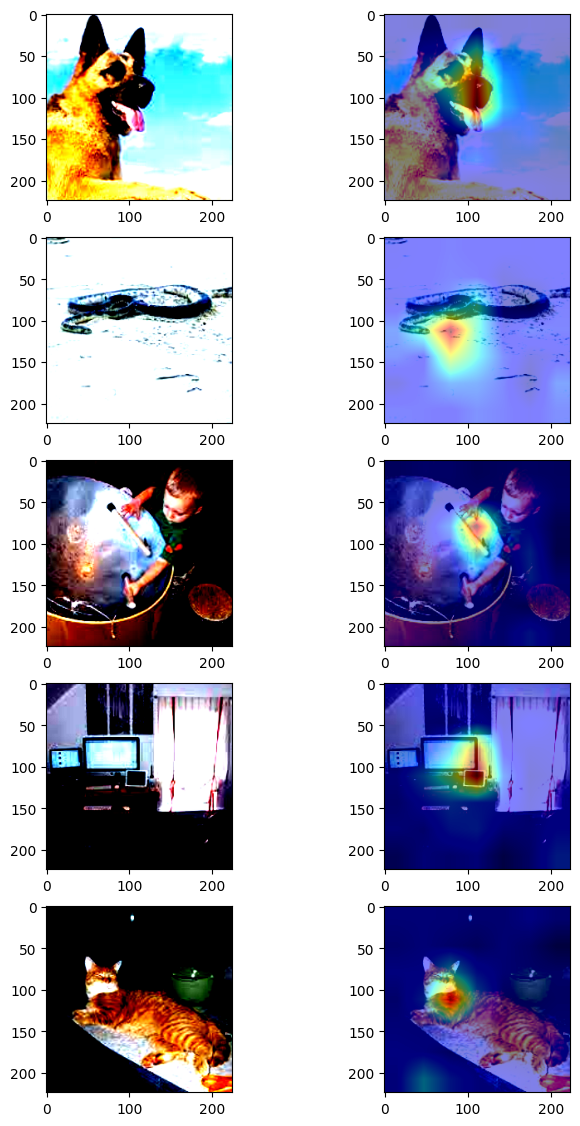

In [10]:
CAM_dict = {}
CAM = {}
plt.figure(figsize=(8,14))
j = 1
model = models.resnet50(weights = "IMAGENET1K_V2")
for i in range(1,6):
    fileloc = f'sample-images/i{i}.jpg'
    input_tensor = preprocess(Image.open(fileloc)).unsqueeze(0)
    h = model.layer4.register_forward_hook(hook_CAM(CAM_dict,i))
    #h.remove()
    output = model(input_tensor)
    _,w = torch.topk(output,1)
    out = model.fc.weight[w.item()]
    
    plt.subplot(5,2,j)
    plt.imshow(torch.permute(input_tensor.squeeze(),(1,2,0)).detach().numpy())
    
    j = j+1
    
    plt.subplot(5,2,j)
    CAM_dict[i] = CAM_dict[i].squeeze()
    out = out.unsqueeze(1).unsqueeze(1)
    ans = (CAM_dict[i] * out).sum(0)
    ans = transforms.Resize(224)(ans.unsqueeze(0))
    CAM[i] = torch.permute(input_tensor.squeeze(),(1,2,0))
    plt.imshow(torch.permute(input_tensor.squeeze(),(1,2,0)).detach().numpy(),cmap='gray')    
    plt.imshow(ans.squeeze(0).detach().numpy(),cmap='jet',alpha=0.5)
    
    j= j+1

# Guided Grad-CAM

In [11]:
CAM[1].shape

torch.Size([224, 224, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


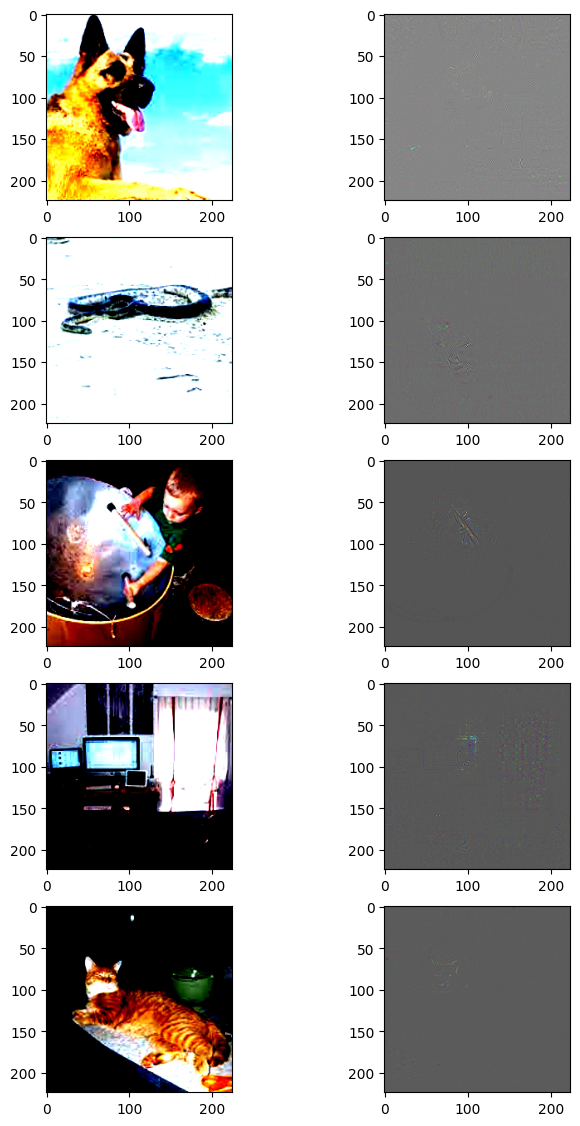

In [12]:
plt.figure(figsize=(8,14))
j=1
for i in range(1,6):
    plt.subplot(5,2,j)
    plt.imshow(original[i])
    j=j+1
    
    plt.subplot(5,2,j)
    plt.imshow(normalize(guided_back[i] * CAM[i]))
    j = j+1

# Question 2

In [13]:
#Contour Setting
x1 = np.arange(-2,2,0.01)
x2 = np.arange(-2,2,0.01)
X,Y = np.meshgrid(x1,x2)
Z = 10*X**2 + Y**2

In [14]:
#GIF Plotting Function
@gif.frame
def plot(i,arr,name):
    ax = plt.axes()
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_title('3D contour of '+name)
    x = arr[0:i,0]
    y = arr[0:i,1]
    z = 10*x**2 + y**2   
    ax.plot(x, y,color='red')
    ax.contourf(X, Y, Z, 50,alpha=.3,cmap='jet')

In [15]:
#Matrix Representation of function and it's gradient
H1 = np.array([[10,0],[0,1]])
H2 = np.array([[20,0],[0,2]])
f = lambda x: H1@(x**2)
fdash = lambda x: H2@x

In [16]:
#Initial Point
x = np.array([2,2])
x 

array([2, 2])

# Vanilla SGD

In [17]:
#Update Equation
eta = 0.05
sgd=[]
sgd.append(x)
for i in range(30):
    gradient = fdash(x)
    x = x - eta * gradient
    sgd.append(x)
sgd=np.array(sgd)

In [18]:
#Generating frames for GIF
begin=time.time()
frames = [plot(i,sgd,'Vanilla SGD') for i in range(30)]
end=time.time()
end-begin

4.290590286254883

In [19]:
#Saving GIF
gif.save(frames, 'sgd.gif', duration=250)

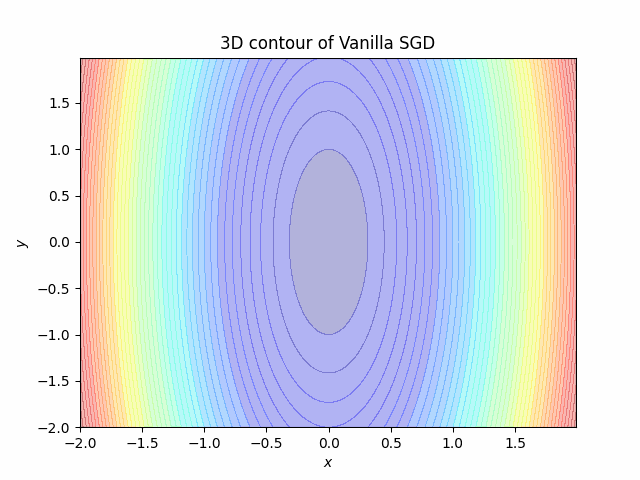

In [20]:
from IPython.display import Image
Image(open('sgd.gif','rb').read())

# SGD with Momentum

In [21]:
x = np.array([2,2])

In [22]:
vt=0
rho=0.5
eta=0.005
sgdm=[]
sgdm.append(x)
for i in range(30):
    gradient = fdash(x)
    vt=(rho*vt)+gradient
    x = x - (eta * vt)
    sgdm.append(x)
sgdm=np.array(sgdm)

In [23]:
begin=time.time()
frames = [plot(i,sgdm,'SGD with Momentum') for i in range(30)]
end=time.time()
end-begin

4.550477743148804

In [24]:
gif.save(frames, 'sgdm.gif', duration=250)

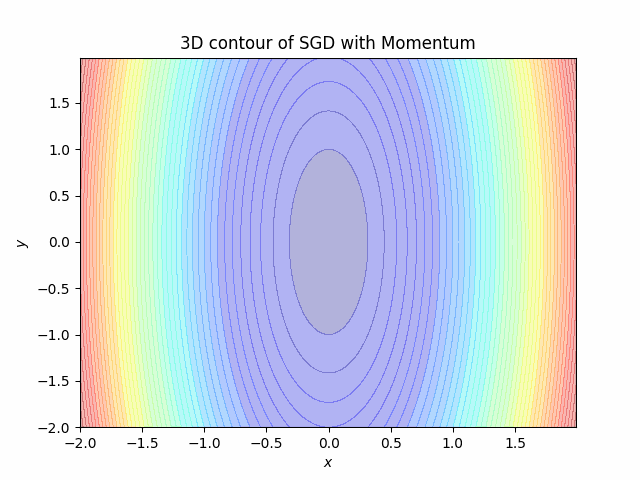

In [25]:
Image(open('sgdm.gif','rb').read())

# Nesterov Momentum

In [26]:
x = np.array([2,2])

In [27]:
v=0
rho=0.01
nesm=[]
nesm.append(x)
for i in range(30):
    gradient = fdash(x + (rho*v))
    dx = gradient
    v = (rho*v) + dx
    x = x-(eta*v)
    nesm.append(x)
nesm=np.array(nesm)

In [ ]:
begin=time.time()
frames = [plot(i,nesm,'Nesterov Momentum') for i in range(30)]
end=time.time()
end-begin

In [ ]:
gif.save(frames, 'nesm.gif', duration=250)

In [ ]:
Image(open('nesm.gif','rb').read())

# Adagrad

In [ ]:
x = np.array([2,2])

In [ ]:
grad_sq=0
epsilon=0.5
ada=[]
ada.append(x)
for i in range(30):
    gradient = fdash(x)
    dx = gradient
    grad_sq = grad_sq + dx
    x = x - ((eta * dx)/(np.sqrt(grad_sq) +epsilon))
    ada.append(x)
ada=np.array(ada)

In [ ]:
begin=time.time()
frames = [plot(i,ada,'AdaGrad') for i in range(30)]
end=time.time()
end-begin

In [ ]:
gif.save(frames, 'ada.gif', duration=250)

In [ ]:
Image(open('ada.gif','rb').read())

# RMS Prop

In [ ]:
x = np.array([2,2])

In [ ]:
grad_sq=0
epsilon=0.5
rho=0.5
rms=[]
rms.append(x)
for i in range(30):
    gradient = fdash(x)
    dx = gradient
    grad_sq = (rho * grad_sq) + ((1 - rho) * dx)
    x = x - ((eta * dx)/(np.sqrt(grad_sq)+epsilon))
    rms.append(x)
rms=np.array(rms)

In [ ]:
begin=time.time()
frames = [plot(i,rms,'RMSProp') for i in range(30)]
end=time.time()
end-begin

In [ ]:
gif.save(frames, 'rms.gif', duration=250)

In [ ]:
Image(open('rms.gif','rb').read())